<div style="text-align:center;">
  <strong><h1 style="font-size:2em;">Data analysis of job offers extracted from Linkedin by webscraping</h1></strong>
  <strong><h1 style="font-size:2em;">(The dataset was created November 2023)</h1></strong>
</div>

In [1]:
import pandas as pd

In [2]:
# Comprobar codificación del dataset si es necesario
import chardet

# Detect the encoding of the file

filename = 'job_offers_data_analytics.txt'
with open(filename, 'rb') as f:
    result = chardet.detect(f.read())

print(result)

{'encoding': 'Windows-1254', 'confidence': 0.5493291361121226, 'language': 'Turkish'}


In [3]:
# Loading the dataset

import pandas as pd

filename = 'job_offers_data_analytics.txt'

df = pd.read_csv(filename, header=None, sep='\t', names = ['Title','Company', 'Location', 'Description'])
df

,Title,Company,Location,Description
0,Online Data Analyst,TELUS International,"Gerona, Cataluña, España (En remoto)",We are hiring freelance Spanish ...
1,Junior Operations Data Analyst (They/She/He),Glovo,"Barcelona, Cataluña, España (Híbrido)",We are hiring freelance Spanish ...
2,Data Analyst,Carl Friedrik,"Barcelona, Cataluña, España (Híbrido)",SummaryCarl Friedrik is a travel...
3,Data Engineer / Data Analyst,ISPROX,"Badalona, Cataluña, España (Híbrido)",Desde ISPROX estamos buscando in...
4,"Data Analyst (Bangkok Based, relocation provided)",Agoda,"Barcelona, Cataluña, España",About AgodaAgoda is an online tr...
...,...,...,...,...
116,Senior Marketing Data Analyst,Madbox,"Barcelona, Cataluña, España (Híbrido)",Madbox is a mobile gaming compan...
117,Consultor Business Intelligence,Consulsap,"Barcelona, Cataluña, España",Este anuncio proviene d...
118,Analista de datos,Voiping US,España (En remoto),¡En Voiping US seleccionamos Tal...
119,Data Analyst Bootcamp and Project Work (remote...,Moyyn,España (En remoto),"If you are a student, a recent g..."


In [4]:
# Convert the dataframe into an SQLite database
import sqlite3
db_file='../job_offers_data_analytics.db'
conn = sqlite3.connect(db_file)

df.to_sql(name='job_offers', con=conn, index=False, if_exists='replace')

conn.close()

### Companies that have published more than one job offer

In [47]:
# Companies that have published more than one job offer

df['Company'].value_counts()[df['Company'].value_counts()>1]  # Compañias que han publicado más de 1 oferta

Glovo                                    11
Capgemini                                 3
Capgemini Engineering                     3
eDreams ODIGEO                            3
Agoda                                     3
Criteo                                    3
TELUS International AI Data Solutions     3
Forcadell                                 3
knowmad mood                              3
Rhams Talent                              3
Garaje de ideas                           3
Bluetab, an IBM Company                   3
TecAlliance                               2
HR NET CONSULTING                         2
TELUS International                       2
Leadtech Group                            2
Michael Page                              2
GOOSE Recruitment                         2
EsadeGov                                  2
Deel                                      2
Allianz Technology                        2
HelloMrLead                               2
Moyyn                           

### Find similar or identical job offers for a given company

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df_company = df[df['Company'] == 'Glovo']

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Apply the vectorizer to the 'Description' column
tfidf_matrix = vectorizer.fit_transform(df_company['Description'])

# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Convert the similarity matrix to a DataFrame for better visualization
similarity_df = pd.DataFrame(similarity_matrix, columns=df_company.index, index=df_company.index)
similarity_df1 = similarity_df[]

similarity_df

,1,8,26,49,66,70,71,81,88,92,93
1,1.000000,0.437863,0.445272,0.443322,0.453114,0.462789,0.453352,0.432805,0.450525,0.443322,0.451185
8,0.437863,1.000000,0.890677,0.891784,0.889318,0.889556,0.893467,0.860882,0.899004,0.891784,0.871029
26,0.445272,0.890677,1.000000,0.975289,0.936279,0.892400,0.961395,0.857914,0.940764,0.975289,0.875600
49,0.443322,0.891784,0.975289,1.000000,0.941950,0.895927,0.964791,0.847246,0.945953,1.000000,0.879133
66,0.453114,0.889318,0.936279,0.941950,1.000000,0.893328,0.942869,0.844551,0.977084,0.941950,0.871155
70,0.462789,0.889556,0.892400,0.895927,0.893328,1.000000,0.905908,0.849180,0.901421,0.895927,0.861097
71,0.453352,0.893467,0.961395,0.964791,0.942869,0.905908,1.000000,0.853781,0.947345,0.964791,0.867394
81,0.432805,0.860882,0.857914,0.847246,0.844551,0.849180,0.853781,1.000000,0.854905,0.847246,0.838066
88,0.450525,0.899004,0.940764,0.945953,0.977084,0.901421,0.947345,0.854905,1.000000,0.945953,0.876817
92,0.443322,0.891784,0.975289,1.000000,0.941950,0.895927,0.964791,0.847246,0.945953,1.000000,0.879133


In [18]:
# Display only nondiagonal values larger than 0.9

import numpy as np
mask = (similarity_df.values < 0.9) | np.eye(len(similarity_df), dtype=bool)
result_df = similarity_df.mask(mask, '')
result_df

,1,8,26,49,66,70,71,81,88,92,93
1,,,,,,,,,,,
8,,,,,,,,,,,
26,,,,0.975289,0.936279,,0.961395,,0.940764,0.975289,
49,,,0.975289,,0.94195,,0.964791,,0.945953,1.0,
66,,,0.936279,0.94195,,,0.942869,,0.977084,0.94195,
70,,,,,,,0.905908,,0.901421,,
71,,,0.961395,0.964791,0.942869,0.905908,,,0.947345,0.964791,
81,,,,,,,,,,,
88,,,0.940764,0.945953,0.977084,0.901421,0.947345,,,0.945953,
92,,,0.975289,1.0,0.94195,,0.964791,,0.945953,,


In [48]:
df.iloc[26]['Description']

"              If you’re here, it’s because you’re looking for an exciting ride. A ride that will fuel your ambitions and make a difference in people’s lives. At Glovo, we believe in paving the way forward together!Not your usual app. We are the fastest-growing multi-category delivery player in Europe, Africa, and Western Asia, where we operate in +3000 cities across 25 countries. Every year, +200k merchants generate over 4B€ in sales and over 20M customers get their goods delivered in minutes.Together we revolutionize the way people connect with their everyday needs, from delivering essentials to connecting our ecosystem of users through innovative solutions powered by technology. For us, every day is filled with purpose.What makes our ride unique? 🤝 Our culture and strong values.  We have an ‘’office-first’’ culture and we place collaboration at the center of everything we do! We have a non-vanilla personality and feedback mindset. We don’t shy away from difficult conversations - we 

In [53]:
df.iloc[92]['Description']

"              If you’re here, it’s because you’re looking for an exciting ride. A ride that will fuel your ambitions and make a difference in people’s lives. At Glovo, we believe in paving the way forward together!Not your usual app. We are the fastest-growing multi-category delivery player in Europe, Africa, and Western Asia, where we operate in +3000 cities across 25 countries. Every year, +200k merchants generate over 4B€ in sales and over 20M customers get their goods delivered in minutes.Together we revolutionize the way people connect with their everyday needs, from delivering essentials to connecting our ecosystem of users through innovative solutions powered by technology. For us, every day is filled with purpose.What makes our ride unique? 🤝 Our culture and strong values.  We have an ‘’office-first’’ culture and we place collaboration at the center of everything we do! We have a non-vanilla personality and feedback mindset. We don’t shy away from difficult conversations - we 

### Find common datascience terms in the job ooffers

In [35]:
# List of terms
term_list = ['Excel','Google Sheets','Python','Pyspark', 'Pandas', 'Matplotlib', 'Spark', 'Ray', 'AWS', 'GCP', 'Google Cloud', 'Azure',
             'Redshift', 'Snowflake', 'Tensorflow', 'Pytorch', 'JAX', 'SQL', 'Git', 'Github', 'Kubeflow', 'Airflow',
             'Flink', 'Kibana', 'Tableau', 'Transformers', 'SpaCy', 'NLTK', 'RAG', 'Looker Studio', 'Power BI', 'Redshift',
             'Snowflake', 'Docker', 'Azkaban', 'Docker', 'Kubernetes', 'DAX', 'Visual Basic', 'Scala','SAS', 'Qlik Sense', 'Qlik View',
             'QlikSense', 'QlikView', 'Quicksight', 'Microstrategy', 'Adobe Analytics', 'Google Analytics', 'dbt', 'Matlab', 
            'Periscope', 'Amplitude', 'ContentSquare', 'Bloomreach', 'Databricks', 'Jupyter', 'iPython', 'HubSpot', 'Salesforce',
             'Marketo', 'Dreamdata', 'Snowflake', 'BigQuery'

 ]

term_list1 = term_list + [term.lower() for term in term_list]  # include lowercase versions of the terms

term_list_upper = [term.upper() for term in term_list]

import re

# Function to find matching terms in a text (case-insensitive)
def find_matching_terms(text, terms):
    if isinstance(text, str):  # Check if the value is a valid string
        text_lower = text.lower()  # Convert the text to lowercase
        matching_terms = [term.upper() for term in terms if re.search(r'\b' + re.escape(term.lower()) + r'\b', text_lower)]
        return ', '.join(matching_terms)
    else:
        return ''  # Return an empty string for NaN values

# Create a new column with matching terms
df['Terms'] = df['Description'].apply(lambda x: find_matching_terms(x, term_list1))


df

,Title,Company,Location,Description,Regime,Terms
0,Online Data Analyst,TELUS International,"Gerona, Cataluña, España (En remoto)",We are hiring freelance Spanish ...,En remoto,
1,Junior Operations Data Analyst (They/She/He),Glovo,"Barcelona, Cataluña, España (Híbrido)",We are hiring freelance Spanish ...,Híbrido,
2,Data Analyst,Carl Friedrik,"Barcelona, Cataluña, España (Híbrido)",SummaryCarl Friedrik is a travel...,Híbrido,"SQL, TABLEAU, BIGQUERY, SQL, TABLEAU, BIGQUERY"
3,Data Engineer / Data Analyst,ISPROX,"Badalona, Cataluña, España (Híbrido)",Desde ISPROX estamos buscando in...,Híbrido,"SQL, TABLEAU, MICROSTRATEGY, SQL, TABLEAU, MIC..."
4,"Data Analyst (Bangkok Based, relocation provided)",Agoda,"Barcelona, Cataluña, España",About AgodaAgoda is an online tr...,NaN,"PYTHON, PANDAS, SQL, TABLEAU, POWER BI, SAS, P..."
...,...,...,...,...,...,...
116,Senior Marketing Data Analyst,Madbox,"Barcelona, Cataluña, España (Híbrido)",Madbox is a mobile gaming compan...,Híbrido,"SQL, SQL"
117,Consultor Business Intelligence,Consulsap,"Barcelona, Cataluña, España",Este anuncio proviene d...,NaN,"SQL, QLIKSENSE, QLIKVIEW, SQL, QLIKSENSE, QLIK..."
118,Analista de datos,Voiping US,España (En remoto),¡En Voiping US seleccionamos Tal...,En remoto,
119,Data Analyst Bootcamp and Project Work (remote...,Moyyn,España (En remoto),"If you are a student, a recent g...",En remoto,"PYTHON, PYTHON"


### Find job offers with no common terms

In [36]:
df[df['Terms'] == '']

,Title,Company,Location,Description,Regime,Terms
0,Online Data Analyst,TELUS International,"Gerona, Cataluña, España (En remoto)",We are hiring freelance Spanish ...,En remoto,
1,Junior Operations Data Analyst (They/She/He),Glovo,"Barcelona, Cataluña, España (Híbrido)",We are hiring freelance Spanish ...,Híbrido,
7,Online Data Analyst - Spain,TELUS International AI Data Solutions,España (En remoto),Description and RequirementsTELU...,En remoto,
39,Online Data Analyst,TELUS International,"Barcelona, Cataluña, España (En remoto)",We are hiring freelance Spanish ...,En remoto,
44,WORK FROM HOME - Online Data Analyst,TELUS International AI Data Solutions,España (En remoto),Why USTELUS International AI-Dat...,En remoto,
51,Spanish Speaker - Online Data Analyst,TELUS International AI Data Solutions,España (En remoto),Why USTELUS International AI-Dat...,En remoto,
64,Prácticas de Analista de datos (remoto),HelloMrLead,"Barcelona, Cataluña, España (En remoto)","Con esta oferta, de Prácticas de...",En remoto,
72,DATA ANALYST - RETENTION,MCR International | Executive Search,"Barcelona, Cataluña, España (Presencial)",Descripción Del Trabajo / Job De...,Presencial,
78,Analista de datos (prácticas en remoto),HelloMrLead,España (En remoto),Con esta oferta de prácticas de ...,En remoto,
82,Consultor BI,FRG Technology Consulting,"Barcelona, Cataluña, España",Actualmente seleccionamos un per...,NaN,


In [37]:
df.iloc[25]['Description']

"              What You'll Do:At Criteo, we're not just about advertising; we're about creating richer experiences for every consumer around the globe. With 20 offices worldwide, serving over 18,000 customers, and delivering 5 billion ad impressions daily, our reach is as vast as our ambition.As a member of our Solutions & Innovation Analytics team, you won't just analyse data; you'll be the cornerstone that connects groundbreaking ideas with real-world business applications. Here, your expertise will not only shape solutions but also empower our clients and commercial teams to make impactful decisions.📊 What You'll Do: Data-Driven Innovation: Leverage cutting-edge tech like Hadoop, Vertica, Tableau, Git, Python, and SQL to transform complex business challenges into groundbreaking solutions.Collaboration at Its Core: Work side by side with cross-functional teams to deliver insights that not only drive revenue but also foster client success.Tech Playground: Immerse yourself in an enviro

### Most used datascience tools

In [38]:
# Count occurrences of each term in the "MatchingTerms" column
term_counts = {term: df['Terms'].str.count(term).sum() for term in term_list_upper}

# Sort terms by the number of occurrences in descending order
sorted_terms = sorted(term_counts.items(), key=lambda x: x[1], reverse=True)

# Display the sorted terms and their counts
for term, count in sorted_terms:
    print(f'{term}: {count}')

SQL: 146
PYTHON: 122
POWER BI: 76
TABLEAU: 58
EXCEL: 50
DAX: 30
SAS: 30
SNOWFLAKE: 24
REDSHIFT: 20
AWS: 18
GOOGLE ANALYTICS: 14
BIGQUERY: 14
AZURE: 12
GIT: 12
QLIKVIEW: 12
PANDAS: 10
AMPLITUDE: 10
GOOGLE CLOUD: 8
MICROSTRATEGY: 8
DBT: 8
JUPYTER: 8
IPYTHON: 8
QLIK SENSE: 6
ADOBE ANALYTICS: 6
SALESFORCE: 6
GOOGLE SHEETS: 4
SPARK: 2
GCP: 2
GITHUB: 2
LOOKER STUDIO: 2
QLIK VIEW: 2
QLIKSENSE: 2
QUICKSIGHT: 2
MATLAB: 2
PERISCOPE: 2
CONTENTSQUARE: 2
BLOOMREACH: 2
DATABRICKS: 2
HUBSPOT: 2
PYSPARK: 0
MATPLOTLIB: 0
RAY: 0
TENSORFLOW: 0
PYTORCH: 0
JAX: 0
KUBEFLOW: 0
AIRFLOW: 0
FLINK: 0
KIBANA: 0
TRANSFORMERS: 0
SPACY: 0
NLTK: 0
RAG: 0
DOCKER: 0
AZKABAN: 0
KUBERNETES: 0
VISUAL BASIC: 0
SCALA: 0
MARKETO: 0
DREAMDATA: 0


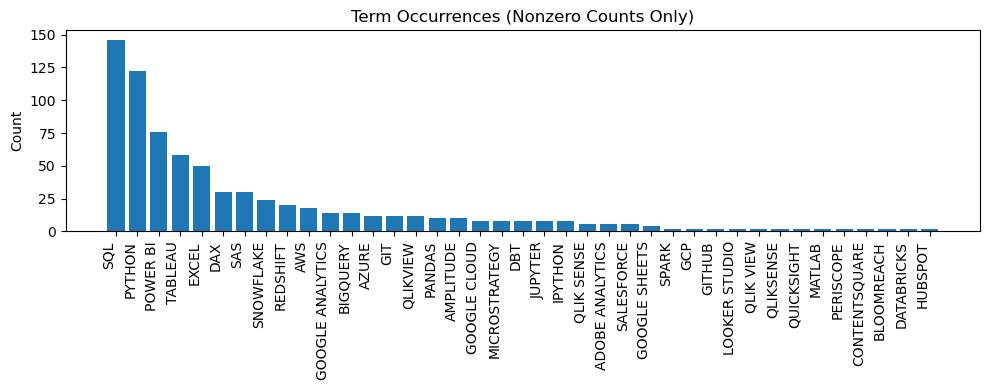

In [39]:
import matplotlib.pyplot as plt

# Count occurrences of each term in the "Terms" column
term_counts = {term: df['Terms'].str.count(term).sum() for term in term_list_upper}

# Filter out terms with zero counts
nonzero_terms = {term: count for term, count in term_counts.items() if count > 0}

# Sort terms by the number of occurrences in descending order
sorted_terms = sorted(nonzero_terms.items(), key=lambda x: x[1], reverse=True)

# Plot a histogram of term occurrences
plt.figure(figsize=(10, 4))
plt.bar([term[0] for term in sorted_terms], [term[1] for term in sorted_terms])
plt.ylabel('Count')
plt.title('Term Occurrences (Nonzero Counts Only)')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


In [56]:
df.iloc[12]['Description']

'              Gaming:Welcome to the world of land-based gaming. Light & Wonder’s gaming team builds cutting-edge technology, products, and content for the most iconic casinos and operators across the globe.Position SummaryWe are looking for a confident analyst to join our dynamic Business Intelligence and Analytics team. As a key member, you will play a pivotal role in analyzing data and collaborating with key stakeholders to enhance various aspects of our operations. Working closely with cross-functional teams and management, you will identify areas for improvement and craft data-driven solutions.This role encompasses reporting, dashboard development, and solving analytical problems. The ideal candidate should be adept at collaborating with management at all levels to provide insights into driving efficiency and improvements within the Operations environment. The successful Operations Analyst will be self-motivated to learn diverse technologies and analytical methodologies.Please not

### Find how many job offers imply hybrid or remote work

In [19]:
df['Regime'] = df['Location'].str.extract(r'\((.*?)\)')
df

,Title,Company,Location,Description,Regime
0,Online Data Analyst,TELUS International,"Gerona, Cataluña, España (En remoto)",We are hiring freelance Spanish ...,En remoto
1,Junior Operations Data Analyst (They/She/He),Glovo,"Barcelona, Cataluña, España (Híbrido)",We are hiring freelance Spanish ...,Híbrido
2,Data Analyst,Carl Friedrik,"Barcelona, Cataluña, España (Híbrido)",SummaryCarl Friedrik is a travel...,Híbrido
3,Data Engineer / Data Analyst,ISPROX,"Badalona, Cataluña, España (Híbrido)",Desde ISPROX estamos buscando in...,Híbrido
4,"Data Analyst (Bangkok Based, relocation provided)",Agoda,"Barcelona, Cataluña, España",About AgodaAgoda is an online tr...,NaN
...,...,...,...,...,...
116,Senior Marketing Data Analyst,Madbox,"Barcelona, Cataluña, España (Híbrido)",Madbox is a mobile gaming compan...,Híbrido
117,Consultor Business Intelligence,Consulsap,"Barcelona, Cataluña, España",Este anuncio proviene d...,NaN
118,Analista de datos,Voiping US,España (En remoto),¡En Voiping US seleccionamos Tal...,En remoto
119,Data Analyst Bootcamp and Project Work (remote...,Moyyn,España (En remoto),"If you are a student, a recent g...",En remoto


In [20]:
df['Regime'].value_counts()

Híbrido       49
En remoto     41
Presencial    21
Name: Regime, dtype: int64

In [30]:
N_offers = df['Title'].count()

N_hibrid = df[df['Regime']=='Híbrido']['Regime'].count()
N_hibrid = round(N_hibrid*100/N_offers, 1)
            
N_remoto = df[df['Regime']=='En remoto']['Regime'].count()
N_remoto = round(N_remoto*100/N_offers, 1)  
            
N_presencial = df[df['Regime']=='Presencial']['Regime'].count()
N_presencial = round(N_presencial*100/N_offers, 1) 
            
N_unspecified = round((100 -N_hibrid -N_remoto - N_presencial), 1)


print(N_hibrid, " % híbrido")
print(N_remoto, " % remoto")
print(N_presencial, " % presencial")
print(N_unspecified, " % no especificado")

40.5  % híbrido
33.9  % remoto
17.4  % presencial
8.2  % no especificado


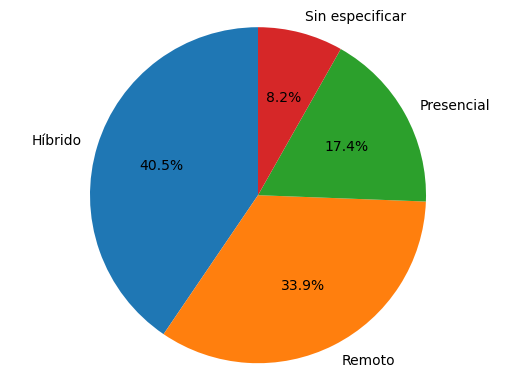

In [41]:
# Sample data
labels = ['Híbrido', 'Remoto', 'Presencial', 'Sin especificar']
sizes = [N_hibrid, N_remoto, N_presencial, N_unspecified]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)



# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

### Find years of experience required

In [15]:
import re
# Define a regular expression pattern for the desired text patterns
#pattern = r'(\d+)\s+(años de experiencia|years of experience)'
pattern = r'(\d+)\s*(-?\s*\d*)\s*(años de experiencia|years of experience)'
# Use re.findall to find matches directly
df['Experience'] = df['Description'].apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else None)

df_filtered = df.dropna(subset=['Experience'])
df_filtered

,Title,Company,Location,Description,Terms,Regime,Experience
3,Data Engineer / Data Analyst,ISPROX,"Badalona, Cataluña, España (Híbrido)",Desde ISPROX estamos buscando in...,"SQL, GIT, TABLEAU, MICROSTRATEGY",Híbrido,"(4, , años de experiencia)"
10,Data Analyst (AWS),knowmad mood,Barcelona y alrededores (En remoto),"¡Somos knowmad mood, anteriormen...","AWS, SNOWFLAKE, SQL, SNOWFLAKE, SAS, SNOWFLAKE",En remoto,"(3, , años de experiencia)"
13,Data Analyst,Garaje de ideas,Barcelona y alrededores (Híbrido),Lo que buscamos es…Un/a Data Ana...,"DBT, GOOGLE CLOUD, SQL, GIT, TABLEAU, SAS, GOO...",Híbrido,"(5, , años de experiencia)"
18,BI Data Analyst,eDreams ODIGEO,"Barcelona, Cataluña, España (Híbrido)",eDreams ODIGEO is one of the wor...,"EXCEL, PYTHON, GOOGLE CLOUD, SQL, GIT, RAG, MI...",Híbrido,"(3, , years of experience)"
19,BI Data Analyst,eDreams ODIGEO,"Barcelona, Cataluña, España (Híbrido)",eDreams ODIGEO is one of the wor...,"EXCEL, PYTHON, GOOGLE CLOUD, SQL, GIT, RAG, MI...",Híbrido,"(3, , years of experience)"
34,Digital Data Analyst,Garaje de ideas,España (En remoto),Lo que buscamos es…Un/a Digital ...,"GIT, GOOGLE ANALYTICS, BIGQUERY",En remoto,"(5, , años de experiencia)"
36,Data Analyst Power BI,Capgemini Engineering,"Barcelona, Cataluña, España (Híbrido)",¡Hola! Somos CAPGEMINITenemos la...,"EXCEL, PYTHON, POWER BI, DAX, VISUAL BASIC",Híbrido,"(3, , años de experiencia)"
37,Data Analyst Power BI,Capgemini Engineering,"Barcelona, Cataluña, España (Híbrido)",¡Hola! Somos CAPGEMINITenemos la...,"EXCEL, PYTHON, POWER BI, DAX, VISUAL BASIC",Híbrido,"(3, , años de experiencia)"
38,Data Analyst Power BI,Capgemini Engineering,"Barcelona, Cataluña, España (Híbrido)",¡Hola! Somos CAPGEMINITenemos la...,"EXCEL, PYTHON, POWER BI, DAX, VISUAL BASIC",Híbrido,"(3, , años de experiencia)"
42,Data Analyst,DDB Spain,"Barcelona, Cataluña, España (Híbrido)",Para nuestra oficina de DDB Barc...,"EXCEL, GIT, POWER BI, ADOBE ANALYTICS",Híbrido,"(2, -3, años de experiencia)"


In [22]:
df.iloc[52]['Description']

'              Desde el equipo de LIGHTHOUSE, nuestra área de Data & Analytics, ayudamos a nuestros clientes a encontrar la eficiencia y el alto rendimiento en todas sus funciones TIC, tanto internas como externas hacia sus unidades de negocio y proveedores: buscando la máxima eficiencia en la operación de sus servicios y ajustando sus costes; así como incrementando su trascendencia en la cuenta de resultados y facilitando la innovación.Actualmente, nos encontramos en proceso de crecimiento y estamos buscando un/a Manager Data Scientist para incorporarse al equipo.¿Qué podrás hacer?  Gestionar la preparación, entrega, informes, lanzamiento, monitorización y evaluación de proyectos y compromisos asignados, asumiendo la responsabilidad de los proyectos D&A y compromisos de mayor riesgo.  Supervisar el desarrollo de la Estrategia D&A: Definición de objetivos y áreas de valor, casos de uso, arquitecturas y tecnologías, mapas de información interna / externa y roadmapsde adopción de Big Dat

### Find salary

In [46]:
import re
# Define a regular expression pattern for the desired text patterns
pattern = r'(\d[\d,\.]*)\s*(EUR|€|eur|euros)' 

# Use re.findall to find matches directly
df['Salary'] = df['Description'].apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else None)

df_filtered = df.dropna(subset=['Salary'])
df_filtered

,Title,Company,Location,Description,Regime,Terms,Salary,Salary2,Sentence_around_salario,Sentence_around_€
3,Data Engineer / Data Analyst,ISPROX,"Badalona, Cataluña, España (Híbrido)",Desde ISPROX estamos buscando in...,Híbrido,"SQL, TABLEAU, MICROSTRATEGY, SQL, TABLEAU, MIC...","(30.000, €)",salario,"- Salario: Ofrecemos un salario competitivo, e...",None
13,Data Analyst,Garaje de ideas,Barcelona y alrededores (Híbrido),Lo que buscamos es…Un/a Data Ana...,Híbrido,"GOOGLE CLOUD, SQL, TABLEAU, GOOGLE ANALYTICS, ...","(500, €)",salario,Retribución flexible: Ahorra en IRPF dedicando...,None
20,Senior Product Data Analyst,Treatwell,"Barcelona, Cataluña, España (Híbrido)",As a Senior Product Data Analyst...,Híbrido,"PYTHON, SQL, PYTHON, SQL","(40, EUR)",None,None,None
34,Digital Data Analyst,Garaje de ideas,España (En remoto),Lo que buscamos es…Un/a Digital ...,En remoto,"GOOGLE ANALYTICS, BIGQUERY, GOOGLE ANALYTICS, ...","(500, €)",salario,Retribución flexible: Ahorra en IRPF dedicando...,None
57,Lead Data Analyst,Garaje de ideas,España (En remoto),Lo que buscamos es…Una persona c...,En remoto,"AMPLITUDE, AMPLITUDE","(500, €)",salario,Retribución flexible: Ahorra en IRPF dedicando...,None
64,Prácticas de Analista de datos (remoto),HelloMrLead,"Barcelona, Cataluña, España (En remoto)","Con esta oferta, de Prácticas de...",En remoto,,"(300, €)",remuneración,"Contrato progresivo, ampliando responsabilida...",None
78,Analista de datos (prácticas en remoto),HelloMrLead,España (En remoto),Con esta oferta de prácticas de ...,En remoto,,"(300, €)",remuneración,"Contrato progresivo, ampliando responsabilida...",None
89,Senior Data Analyst (Power BI) & AWS Services ...,"Bluetab, an IBM Company",España (En remoto),"Bluetab, an IBM Company. certifi...",En remoto,"AWS, REDSHIFT, SQL, POWER BI, REDSHIFT, DAX, A...","(50, €)",salario,Ahora viene lo bueno por ser bluetaber… ¿Qué ...,None
90,Senior Data Analyst (Power BI) & AWS Services ...,"Bluetab, an IBM Company",España (En remoto),"Bluetab, an IBM Company. certifi...",En remoto,"AWS, REDSHIFT, SQL, POWER BI, REDSHIFT, DAX, A...","(50, €)",salario,Ahora viene lo bueno por ser bluetaber… ¿Qué ...,None
91,Senior Data Analyst (Power BI) & AWS Services ...,"Bluetab, an IBM Company",España (En remoto),"Bluetab, an IBM Company. certifi...",En remoto,"AWS, REDSHIFT, SQL, POWER BI, REDSHIFT, DAX, A...","(50, €)",salario,Ahora viene lo bueno por ser bluetaber… ¿Qué ...,None


### Find other relevant terms and extract the phrase they appear in

In [43]:
# Define a regular expression pattern for the desired text patterns
pattern = r'(salario|salary|remuneración)' 

# Use re.findall to find matches directly
df['Salary2'] = df['Description'].apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else None)

df_filtered1 = df.dropna(subset=['Salary2'])
df_filtered1

,Title,Company,Location,Description,Regime,Terms,Salary,Salary2
2,Data Analyst,Carl Friedrik,"Barcelona, Cataluña, España (Híbrido)",SummaryCarl Friedrik is a travel...,Híbrido,"SQL, TABLEAU, BIGQUERY, SQL, TABLEAU, BIGQUERY",None,salary
3,Data Engineer / Data Analyst,ISPROX,"Badalona, Cataluña, España (Híbrido)",Desde ISPROX estamos buscando in...,Híbrido,"SQL, TABLEAU, MICROSTRATEGY, SQL, TABLEAU, MIC...","(30.000, €)",salario
11,Data Analyst - Thingworx,Between Technology,"Barcelona, Cataluña, España (Presencial)",¿Te interesa trabajar en I+D den...,Presencial,"PYTHON, SQL, PYTHON, SQL",None,salario
13,Data Analyst,Garaje de ideas,Barcelona y alrededores (Híbrido),Lo que buscamos es…Un/a Data Ana...,Híbrido,"GOOGLE CLOUD, SQL, TABLEAU, GOOGLE ANALYTICS, ...","(500, €)",salario
23,Underwriter and Business Data Analyst,AXA Partners,"Barcelona, Cataluña, España (Híbrido)",In Axa Partners Spain we are loo...,Híbrido,"EXCEL, PYTHON, SQL, POWER BI, SAS, EXCEL, PYTH...",None,remuneración
25,"Data Analyst, EMEA",Criteo,"Barcelona, Cataluña, España (Híbrido)","What You'll Do:At Criteo, we're ...",Híbrido,"PYTHON, SQL, GIT, TABLEAU, PYTHON, SQL, GIT, T...",None,salary
34,Digital Data Analyst,Garaje de ideas,España (En remoto),Lo que buscamos es…Un/a Digital ...,En remoto,"GOOGLE ANALYTICS, BIGQUERY, GOOGLE ANALYTICS, ...","(500, €)",salario
41,Data Analyst,Factorial,"Barcelona, Cataluña, España (Presencial)",Hello! In Factorial we are looki...,Presencial,"PYTHON, AWS, SQL, POWER BI, MICROSTRATEGY, BIG...",None,salary
43,Senior Game Data Analyst - Tarboosh Games,Voodoo,"Barcelona, Cataluña, España (En remoto)",Voodoo is a tech company that cr...,En remoto,"PYTHON, SQL, PYTHON, SQL",None,salary
46,Senior Data Analyst,Zurich Insurance,"Barcelona, Cataluña, España (Híbrido)",Our opportunity Are you passiona...,Híbrido,"PYTHON, SPARK, TABLEAU, POWER BI, DAX, QLIKVIE...",None,salary


In [25]:
df.iloc[4]['Description']

'              Si te consideras una persona analítica, autónoma y proactiva, con gran capacidad de comunicación y con un inglés fluido, tenemos una oportunidad para ti en nuestras oficinas de Barcelona.Como Data Scientist, contribuirás en la gestión de proyectos de Machine Learning en entorno Cloud, en contacto con stakeholders para desarrollar modelados estadísticos y predictivos.¿Qué te ofrecemos? 4-day work-week: trabajamos 34 horas dentro de una semana laboral de 4 días para potenciar la creatividad y la conciliación. Además, contamos con flexibilidad horaria de entrada y salida.Oficinas abiertas al mar: estamos en la Barceloneta frente al Mar Mediterráneo. Las vistas nos inspiran y el entorno nos permite disfrutar de una vida saludable: hacer deporte, llegar en bicicleta o caminando o comer al aire libre.Podrás flexibilizar tu salario destinándolo a servicios como seguro de salud, transporte, guardería y comida. Además podrás disfrutar de café, infusiones y fruta fresca cada día.D

In [45]:
def find_sentence_around_word(description, target_word):
    pattern = re.compile(r'([^.]*\b' + re.escape(target_word) + r'\b[^.]*)', re.IGNORECASE)
    match = pattern.search(description)
    return match.group(1) if match else None

target_word = '€'

# Create a new column 'Sentence_around_target'
df[f'Sentence_around_{target_word}'] = df['Description'].apply(lambda x: find_sentence_around_word(x, target_word))

df_filtered = df.dropna(subset=[f'Sentence_around_{target_word}'])
df_filtered

,Title,Company,Location,Description,Regime,Terms,Salary,Salary2,Sentence_around_salario,Sentence_around_€


In [27]:
df_filtered.iloc[2]['Sentence_around_chemistry']

' Experience with search engines, classification algorithms, recommendation systems, and relevance evaluation methodologies Domain knowledge of research areas like chemistry, patent, life science is plus'

In [35]:
# Define a regular expression pattern for the desired text patterns
pattern = r'(Intern|Interino|Becario)' 

# Use re.findall to find matches directly
df['analyst'] = df['Title'].apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else None)

df_filtered1 = df.dropna(subset=['analyst'])
df_filtered1



,Title,Company,Location,Description,analyst,Sentence_around_becario,Sentence_around_interino,Sentence_around_intern
21,Becario/a Data Analyst,Grupo Planeta,"Barcelona, Cataluña, España (Presencial)",Estamos buscando un/a estudiante...,Becario,None,None,None
81,Operations Data Analyst Intern (They/She/He),Glovo,"Barcelona, Cataluña, España (Híbrido)","If you’re here, it’s because you...",Intern,None,None,We are looking for an Intern (Courier Growth)...


In [38]:
df.iloc[81]['Description']

"              If you’re here, it’s because you’re looking for an exciting ride.A ride that will fuel up your ambitions to take on a new challenge and stretch yourself beyond your comfort zone.We’ll deliver a non-vanilla culture built on talent, where we work to amplify the impact on millions of people, paving the way forward together.Not your usual app. We are the fastest-growing multi-category app connecting millions of users with businesses, and couriers, offering on-demand services from more than 170,000 local restaurants, grocers and supermarkets, and high street retail stores. We operate in more than 1500 cities across 25 countries. Every year, +200k merchants generate over 4B€ in sales through our platform and over 20M customers get their goods delivered in minutes.Together we revolutionize the way people connect with their everyday needs, from delivering essentials to connecting our ecosystem of users through innovative solutions powered by technology. For us, every day is fill